<a href="https://colab.research.google.com/github/ZenoZoldyck/Data_Creation/blob/main/DataCreation_DeConvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.5.0'

In [2]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_data = np.array(train_data)

In [4]:
data = []
for i in range(60000) :
  a = tf.random.normal([100])
  data.append(a)

In [5]:
data_1 = np.array(data)
data_1.shape

(60000, 100)

In [6]:
train_data_norm = train_data / 255

In [7]:
train_data_norm_1 = tf.reshape(train_data_norm, shape=(60000, 28, 28, 1))

In [27]:
model = tf.keras.Sequential([
   tf.keras.layers.Dense(7*7*256, input_dim=100),
   tf.keras.layers.Reshape((7, 7, 256)),                          
   tf.keras.layers.Conv2DTranspose(128, (3, 3), use_bias=False, strides=2, padding="same"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.LeakyReLU(alpha=0.01),
   tf.keras.layers.Conv2DTranspose(64, (3, 3), use_bias=False, strides=1, padding="same"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.LeakyReLU(alpha=0.01),
   tf.keras.layers.Conv2DTranspose(1, (3, 3), use_bias=False, strides=2, padding="same", activation = "tanh")                          
])

model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(lr = 0.0005),
              metrics=["accuracy"])
history = model.fit(data_1, train_data_norm_1, epochs=50) 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0704 - accuracy: 0.8005
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0674 - accuracy: 0.8026
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0672 - accuracy: 0.8023
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0668 - accuracy: 0.8019
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0664 - accuracy: 0.8012
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0658 - accuracy: 0.8003
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0651 - accuracy: 0.7994
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0644 - accuracy: 0.7985
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0636 - accuracy: 0.7977
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.062

In [28]:
data_2 = []
for i in range(1000) :
  a = tf.random.normal([100])
  data_2.append(a)
data_2 = np.array(data_2)

In [29]:
y_pred = model.predict(data_2)

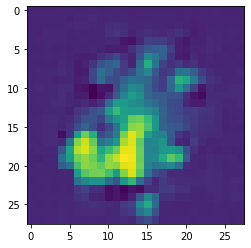

In [31]:
plt.imshow(tf.squeeze(y_pred[40]))

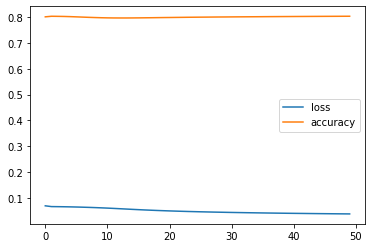

In [32]:
pd.DataFrame(history.history).plot()